# Falsetto Classifier

A basic atempt to classify a song's falsetto level

## Imports and auxiliary functions

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

### Auxiliary functions

In [39]:
def show_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm)
  plt.title('Confusion matrix of the classifier')
  fig.colorbar(cax)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

In [82]:
def get_y_and_X(df):
  y = df['falsetto']

  cols = [col for col in df.columns if col is not 'falsetto' and col is not 'spotify_id']
  X = df.drop(axis=1, columns=['falsetto', 'spotify_id'])
  return y, X

def show_metrics(y_test, y_pred):
  print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
  print('F1 Macro-Score: {}'.format(f1_score(y_test, y_pred, average='macro')))
  print('F1 Weighted-Score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

## Dataframe operations

In [4]:
df = pd.read_csv('main.csv')
df

,gender,falsetto,spotify_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,...,lowlevel.spectral_rolloff.mean,lowlevel.spectral_rolloff.stdev,lowlevel.spectral_skewness.mean,lowlevel.spectral_skewness.stdev,lowlevel.spectral_spread.mean,lowlevel.spectral_spread.stdev,lowlevel.spectral_strongpeak.mean,lowlevel.spectral_strongpeak.stdev,lowlevel.zerocrossingrate.mean,lowlevel.zerocrossingrate.stdev
0,male,0.0,5g5EdgkfKVUceOTJtm0Kel,0.5730,0.487,0.192,0.000003,1.0,0.0759,-17.308,...,1971.881714,2904.578125,2.766868,2.309679,4682942.50,2566181.250,1.312214,1.776766,0.073260,0.091557
1,male,0.0,62GYoGszQfROZswLee6W3O,0.3140,0.850,0.466,0.023400,1.0,0.1290,-15.673,...,2611.819824,2596.150146,1.852206,1.690892,4348480.50,2316541.000,1.372175,1.901234,0.093488,0.074530
2,male,0.0,2nWHzbBWBOePUvAImQv2So,0.0317,0.878,0.951,0.544000,7.0,0.0614,-5.077,...,9238.177734,7254.523926,4.492148,4.754400,4727808.50,4539257.000,0.701681,1.969949,0.138516,0.136973
3,female,0.0,6Llr9PVC1cirKUwu7Fle83,0.6030,0.505,0.625,0.000040,5.0,0.0823,-8.195,...,2351.235840,2622.513428,2.823243,3.105695,3685186.50,2683900.000,1.594873,2.358309,0.086646,0.088080
4,male,0.0,6NF8MZ2trxckVBr82pyyPt,0.7190,0.544,0.425,0.018600,10.0,0.9640,-10.231,...,4418.749023,4766.960449,3.549010,3.535505,3004675.25,2536691.750,0.989734,2.951486,0.123163,0.092290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,male,0.0,4ANFPo7dzs2DdPuONXC9bp,0.0091,0.881,0.549,0.000000,10.0,0.1370,-5.589,...,2941.687500,2695.421143,1.662005,1.671863,4555844.50,2208549.750,1.426403,1.851251,0.101371,0.076952
19966,male,0.0,2QEnZJ8FwpBoyLKcFcgceT,0.0365,0.801,0.774,0.000003,1.0,0.1140,-5.125,...,2758.055908,2346.302490,1.758831,2.122977,3333951.25,1697798.375,1.092398,1.439533,0.094051,0.067690
19967,male,0.0,3xEozpt8pAptvpH69iJhOw,0.7860,0.434,0.314,0.000000,10.0,0.1630,-7.780,...,1763.226318,1430.873047,2.420862,1.929476,3221035.00,1425182.125,2.114549,2.202738,0.064748,0.045259
19968,male,0.0,0DiDStADDVh3SvAsoJAFMk,0.1080,0.795,0.496,0.000000,0.0,0.0645,-5.883,...,2566.776855,2540.895264,1.707363,1.742358,4678761.50,2182918.250,1.449685,1.619190,0.097777,0.080012


In [5]:
df.dropna(subset=['lowlevel.hfc.stdev'],  inplace=True)
df

,gender,falsetto,spotify_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,...,lowlevel.spectral_rolloff.mean,lowlevel.spectral_rolloff.stdev,lowlevel.spectral_skewness.mean,lowlevel.spectral_skewness.stdev,lowlevel.spectral_spread.mean,lowlevel.spectral_spread.stdev,lowlevel.spectral_strongpeak.mean,lowlevel.spectral_strongpeak.stdev,lowlevel.zerocrossingrate.mean,lowlevel.zerocrossingrate.stdev
0,male,0.0,5g5EdgkfKVUceOTJtm0Kel,0.5730,0.487,0.192,0.000003,1.0,0.0759,-17.308,...,1971.881714,2904.578125,2.766868,2.309679,4682942.50,2566181.250,1.312214,1.776766,0.073260,0.091557
1,male,0.0,62GYoGszQfROZswLee6W3O,0.3140,0.850,0.466,0.023400,1.0,0.1290,-15.673,...,2611.819824,2596.150146,1.852206,1.690892,4348480.50,2316541.000,1.372175,1.901234,0.093488,0.074530
2,male,0.0,2nWHzbBWBOePUvAImQv2So,0.0317,0.878,0.951,0.544000,7.0,0.0614,-5.077,...,9238.177734,7254.523926,4.492148,4.754400,4727808.50,4539257.000,0.701681,1.969949,0.138516,0.136973
3,female,0.0,6Llr9PVC1cirKUwu7Fle83,0.6030,0.505,0.625,0.000040,5.0,0.0823,-8.195,...,2351.235840,2622.513428,2.823243,3.105695,3685186.50,2683900.000,1.594873,2.358309,0.086646,0.088080
4,male,0.0,6NF8MZ2trxckVBr82pyyPt,0.7190,0.544,0.425,0.018600,10.0,0.9640,-10.231,...,4418.749023,4766.960449,3.549010,3.535505,3004675.25,2536691.750,0.989734,2.951486,0.123163,0.092290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,male,0.0,4ANFPo7dzs2DdPuONXC9bp,0.0091,0.881,0.549,0.000000,10.0,0.1370,-5.589,...,2941.687500,2695.421143,1.662005,1.671863,4555844.50,2208549.750,1.426403,1.851251,0.101371,0.076952
19966,male,0.0,2QEnZJ8FwpBoyLKcFcgceT,0.0365,0.801,0.774,0.000003,1.0,0.1140,-5.125,...,2758.055908,2346.302490,1.758831,2.122977,3333951.25,1697798.375,1.092398,1.439533,0.094051,0.067690
19967,male,0.0,3xEozpt8pAptvpH69iJhOw,0.7860,0.434,0.314,0.000000,10.0,0.1630,-7.780,...,1763.226318,1430.873047,2.420862,1.929476,3221035.00,1425182.125,2.114549,2.202738,0.064748,0.045259
19968,male,0.0,0DiDStADDVh3SvAsoJAFMk,0.1080,0.795,0.496,0.000000,0.0,0.0645,-5.883,...,2566.776855,2540.895264,1.707363,1.742358,4678761.50,2182918.250,1.449685,1.619190,0.097777,0.080012


### See distributions

In [6]:
df['falsetto'].value_counts()

0.0     16055
2.0      1510
3.0       884
4.0       736
5.0       266
6.0       184
7.0        94
8.0        84
10.0       74
9.0        31
Name: falsetto, dtype: int64

<AxesSubplot:title={'center':'Class distribution'}, xlabel='Falsetto value', ylabel='Occurencies number'>

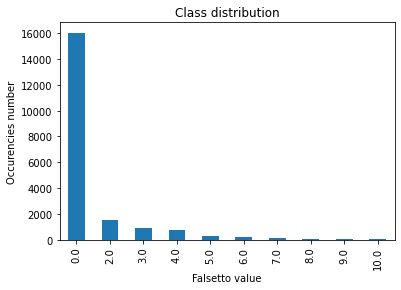

In [7]:
values = df['falsetto'].value_counts().sort_index()
values.plot.bar(**{'title': 'Class distribution', 'xlabel': 'Falsetto value', 'ylabel':'Occurencies number'})

## Classifiers using the entire dataset

### SMOTE oversampling

#### Decision Tree

In [84]:
y,X = get_y_and_X(df)
enc = OneHotEncoder()
enc_X = enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(enc_X, y, test_size=0.33, random_state=13)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [85]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

In [86]:
show_metrics(y_test, y_pred)

Accuracy score: 0.7541345093715546
F1 Macro-Score: 0.09817477985253972
F1 Weighted-Score: 0.6988651302332303


In [87]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.9362239 , 0.02325581, 0.03292181, 0.02427184, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

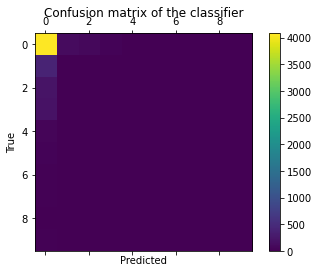

In [88]:
show_confusion_matrix(y_test, y_pred)

#### Using Random Forest

In [89]:
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [90]:
show_metrics(y_test, y_pred)

Accuracy score: 0.8009922822491731
F1 Macro-Score: 0.08895010713192532
F1 Weighted-Score: 0.7124834931790931


In [91]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

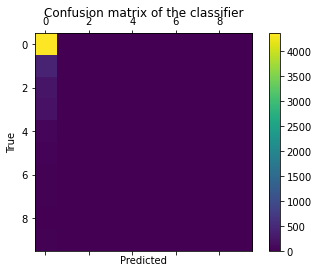

In [92]:
show_confusion_matrix(y_test, y_pred)

### SMOTEENN resampling 

In [93]:
y,X = get_y_and_X(df)
enc = OneHotEncoder()
enc_X = enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(enc_X, y, test_size=0.33, random_state=13)

In [94]:
resample = SMOTEENN()
X_train, y_train = resample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Decision Tree

In [95]:
#Decision Tree
dt_clf2 = DecisionTreeClassifier(random_state=1)
dt_clf2.fit(X_train, y_train)
y_pred = dt_clf2.predict(X_test)

In [96]:
show_metrics(y_test, y_pred)

Accuracy score: 0.06780595369349504
F1 Macro-Score: 0.032343001091052925
F1 Weighted-Score: 0.017990549756774134


In [97]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.        , 0.66976744, 0.16049383, 0.19902913, 0.        ,
       0.02083333, 0.        , 0.        , 0.        , 0.        ])

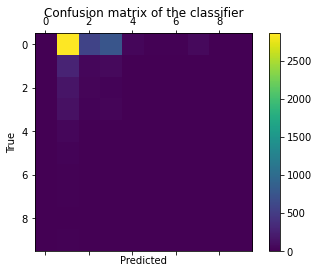

In [98]:
show_confusion_matrix(y_test, y_pred)

#### Random Forest

In [99]:
#Random Forest

rf_clf2 = RandomForestClassifier(random_state=1)
rf_clf2.fit(X_train, y_train)
y_pred = rf_clf2.predict(X_test)

In [100]:
show_metrics(y_test, y_pred)

Accuracy score: 0.07901506798970967
F1 Macro-Score: 0.014645776566757493
F1 Weighted-Score: 0.0115723703118444


In [101]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

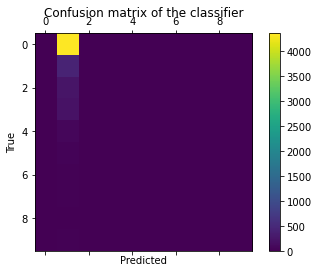

In [102]:
show_confusion_matrix(y_test, y_pred)

### SMOTE `auto`

In [103]:
y,X = get_y_and_X(df)
enc = OneHotEncoder()
enc_X = enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(enc_X, y, test_size=0.33, random_state=11)

In [104]:
oversample = SMOTE(sampling_strategy='auto', k_neighbors=8, random_state=2)
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Decision Tree

In [105]:
#Decision Tree
dt_clf3 = DecisionTreeClassifier(random_state=6)
dt_clf3.fit(X_train, y_train)
y_pred = dt_clf3.predict(X_test)

In [106]:
show_metrics(y_test, y_pred)

Accuracy score: 0.7499081220139655
F1 Macro-Score: 0.09920582481982759
F1 Weighted-Score: 0.6992587916758487


In [107]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.92808062, 0.04567308, 0.01646091, 0.02739726, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

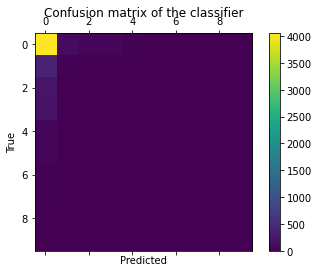

In [108]:
show_confusion_matrix(y_test, y_pred)

#### Random Forest

In [109]:
#Random Forest
rf_clf3 = RandomForestClassifier(random_state=6)
rf_clf3.fit(X_train, y_train)
y_pred = rf_clf3.predict(X_test)

In [110]:
show_metrics(y_test, y_pred)

Accuracy score: 0.8022785740536568
F1 Macro-Score: 0.08902936378466557
F1 Weighted-Score: 0.7142635102606576


In [111]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

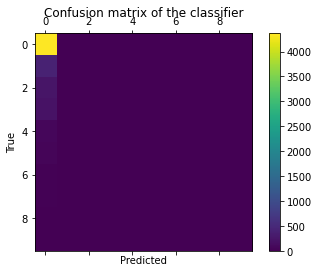

In [112]:
show_confusion_matrix(y_test, y_pred)

#### Balanced Decision Tree 

In [113]:
#DTree Balanced
dt_clf4 = DecisionTreeClassifier(random_state=6, class_weight="balanced")
dt_clf4.fit(X_train, y_train)
y_pred = dt_clf4.predict(X_test)

In [114]:
show_metrics(y_test, y_pred)

Accuracy score: 0.7499081220139655
F1 Macro-Score: 0.09920582481982759
F1 Weighted-Score: 0.6992587916758487


In [115]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.92808062, 0.04567308, 0.01646091, 0.02739726, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

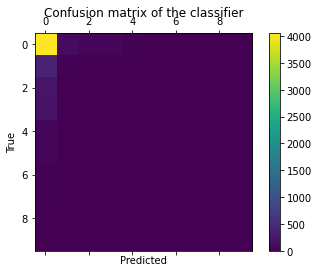

In [116]:
show_confusion_matrix(y_test, y_pred)

#### Balanced Entropy Decision Tree

In [117]:
#DTree Balanced Entropy
dt_clf5 = DecisionTreeClassifier(random_state=8, class_weight="balanced", criterion="entropy")
dt_clf5.fit(X_train, y_train)
y_pred = dt_clf5.predict(X_test)

In [118]:
show_metrics(y_test, y_pred)

Accuracy score: 0.7684674751929438
F1 Macro-Score: 0.09429292266582912
F1 Weighted-Score: 0.7042347872267737


In [119]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.95442052, 0.02644231, 0.00411523, 0.01369863, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

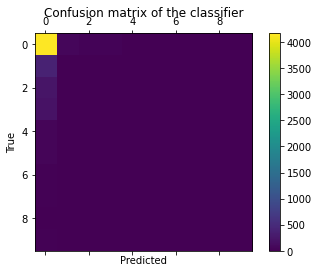

In [120]:
show_confusion_matrix(y_test, y_pred)

## Manually reduce number of `falsetto == 0`

In [8]:
#Get falsetto == 0

index_names = df[df['falsetto'] == 0].index
index_names

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
               10,
            ...
            19958, 19959, 19962, 19963, 19964, 19965, 19966, 19967, 19968,
            19969],
           dtype='int64', length=16055)

In [9]:
max_index = 0.9*len(index_names)
index_drop = index_names[:int(max_index)]
df_new = df.drop(index_drop)
df_new

,gender,falsetto,spotify_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,...,lowlevel.spectral_rolloff.mean,lowlevel.spectral_rolloff.stdev,lowlevel.spectral_skewness.mean,lowlevel.spectral_skewness.stdev,lowlevel.spectral_spread.mean,lowlevel.spectral_spread.stdev,lowlevel.spectral_strongpeak.mean,lowlevel.spectral_strongpeak.stdev,lowlevel.zerocrossingrate.mean,lowlevel.zerocrossingrate.stdev
9,male,2.0,4xbJyF9RDa1VLoZNoCFy1r,0.4930,0.500,0.489,0.000130,2.0,0.1630,-11.428,...,4735.147949,3267.810791,1.116404,1.886502,4561006.00,2603007.000,1.443960,1.749026,0.178995,0.119499
15,female,4.0,6i9b14YXyWIMiQg26IWYA5,0.0370,0.604,0.549,0.000000,5.0,0.0856,-13.252,...,2836.416016,3128.354980,2.057861,1.807891,3878335.25,2358086.750,2.286654,2.462046,0.102232,0.103619
16,female,2.0,62QRbVm7DqR3eoqgT7pEfs,0.4750,0.408,0.511,0.000000,6.0,0.6250,-7.225,...,2104.636719,2154.778809,2.199072,1.584902,2869073.75,1492111.125,2.827456,2.472313,0.074080,0.069771
23,male,2.0,59HxRYpU61UgzewVxove4P,0.0300,0.721,0.507,0.000007,9.0,0.0939,-14.160,...,6266.567871,4363.871094,1.217723,1.479403,4497228.50,2384612.000,0.975161,2.004229,0.220188,0.147456
27,male,4.0,6igsoAR6Co9u7Rq3U7mlOD,0.0195,0.623,0.824,0.130000,6.0,0.0491,-8.971,...,3765.984375,3203.498047,1.726571,1.386702,2836681.00,1839193.250,1.518716,1.905755,0.123977,0.084495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,male,0.0,4ANFPo7dzs2DdPuONXC9bp,0.0091,0.881,0.549,0.000000,10.0,0.1370,-5.589,...,2941.687500,2695.421143,1.662005,1.671863,4555844.50,2208549.750,1.426403,1.851251,0.101371,0.076952
19966,male,0.0,2QEnZJ8FwpBoyLKcFcgceT,0.0365,0.801,0.774,0.000003,1.0,0.1140,-5.125,...,2758.055908,2346.302490,1.758831,2.122977,3333951.25,1697798.375,1.092398,1.439533,0.094051,0.067690
19967,male,0.0,3xEozpt8pAptvpH69iJhOw,0.7860,0.434,0.314,0.000000,10.0,0.1630,-7.780,...,1763.226318,1430.873047,2.420862,1.929476,3221035.00,1425182.125,2.114549,2.202738,0.064748,0.045259
19968,male,0.0,0DiDStADDVh3SvAsoJAFMk,0.1080,0.795,0.496,0.000000,0.0,0.0645,-5.883,...,2566.776855,2540.895264,1.707363,1.742358,4678761.50,2182918.250,1.449685,1.619190,0.097777,0.080012


### See new distribution

<AxesSubplot:title={'center':'Class distribution'}, xlabel='Falsetto value', ylabel='Occurencies number'>

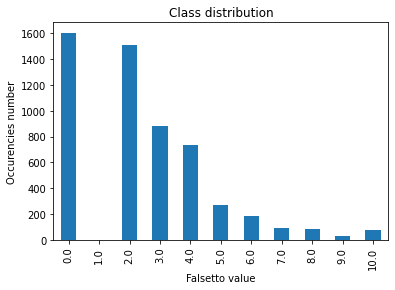

In [10]:
new_values = df_new['falsetto'].value_counts()
new_values = new_values.append(pd.Series({1.0:0}))
new_values = new_values.sort_index()
new_values.plot.bar(**{'title': 'Class distribution', 'xlabel': 'Falsetto value', 'ylabel':'Occurencies number'})

### Classifier using this setting

In [48]:
#1
y, X = get_y_and_X(df_new)
enc = OneHotEncoder()
enc_X = enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(enc_X, y, test_size=0.33, random_state=42)

In [49]:
dt_clf2 = DecisionTreeClassifier(random_state=12, class_weight="balanced", criterion="entropy", max_depth=54)
dt_clf2.fit(X_train, y_train)
y_pred = dt_clf2.predict(X_test)

In [50]:
show_metrics(y_test, y_pred)

Accuracy score: 0.21986754966887417
F1 Macro-Score: 0.09085288429307684
F1 Weighted-Score: 0.20871377326114257


In [51]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.29186603, 0.39066339, 0.09960159, 0.05660377, 0.17721519,
       0.        , 0.        , 0.        , 0.        , 0.        ])

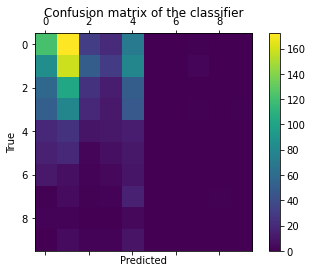

In [52]:
show_confusion_matrix(y_test, y_pred)

## Binary Classifier

In [11]:
df_bin = df.copy()
df_bin['falsetto'] = df_bin['falsetto'].apply(lambda x: 0 if x == 0 else 1)
df_bin

,gender,falsetto,spotify_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,...,lowlevel.spectral_rolloff.mean,lowlevel.spectral_rolloff.stdev,lowlevel.spectral_skewness.mean,lowlevel.spectral_skewness.stdev,lowlevel.spectral_spread.mean,lowlevel.spectral_spread.stdev,lowlevel.spectral_strongpeak.mean,lowlevel.spectral_strongpeak.stdev,lowlevel.zerocrossingrate.mean,lowlevel.zerocrossingrate.stdev
0,male,0,5g5EdgkfKVUceOTJtm0Kel,0.5730,0.487,0.192,0.000003,1.0,0.0759,-17.308,...,1971.881714,2904.578125,2.766868,2.309679,4682942.50,2566181.250,1.312214,1.776766,0.073260,0.091557
1,male,0,62GYoGszQfROZswLee6W3O,0.3140,0.850,0.466,0.023400,1.0,0.1290,-15.673,...,2611.819824,2596.150146,1.852206,1.690892,4348480.50,2316541.000,1.372175,1.901234,0.093488,0.074530
2,male,0,2nWHzbBWBOePUvAImQv2So,0.0317,0.878,0.951,0.544000,7.0,0.0614,-5.077,...,9238.177734,7254.523926,4.492148,4.754400,4727808.50,4539257.000,0.701681,1.969949,0.138516,0.136973
3,female,0,6Llr9PVC1cirKUwu7Fle83,0.6030,0.505,0.625,0.000040,5.0,0.0823,-8.195,...,2351.235840,2622.513428,2.823243,3.105695,3685186.50,2683900.000,1.594873,2.358309,0.086646,0.088080
4,male,0,6NF8MZ2trxckVBr82pyyPt,0.7190,0.544,0.425,0.018600,10.0,0.9640,-10.231,...,4418.749023,4766.960449,3.549010,3.535505,3004675.25,2536691.750,0.989734,2.951486,0.123163,0.092290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,male,0,4ANFPo7dzs2DdPuONXC9bp,0.0091,0.881,0.549,0.000000,10.0,0.1370,-5.589,...,2941.687500,2695.421143,1.662005,1.671863,4555844.50,2208549.750,1.426403,1.851251,0.101371,0.076952
19966,male,0,2QEnZJ8FwpBoyLKcFcgceT,0.0365,0.801,0.774,0.000003,1.0,0.1140,-5.125,...,2758.055908,2346.302490,1.758831,2.122977,3333951.25,1697798.375,1.092398,1.439533,0.094051,0.067690
19967,male,0,3xEozpt8pAptvpH69iJhOw,0.7860,0.434,0.314,0.000000,10.0,0.1630,-7.780,...,1763.226318,1430.873047,2.420862,1.929476,3221035.00,1425182.125,2.114549,2.202738,0.064748,0.045259
19968,male,0,0DiDStADDVh3SvAsoJAFMk,0.1080,0.795,0.496,0.000000,0.0,0.0645,-5.883,...,2566.776855,2540.895264,1.707363,1.742358,4678761.50,2182918.250,1.449685,1.619190,0.097777,0.080012


In [12]:
df_bin['falsetto'].value_counts()

0    16055
1     3863
Name: falsetto, dtype: int64

<AxesSubplot:title={'center':'Class distribution'}, xlabel='Falsetto value', ylabel='Occurencies number'>

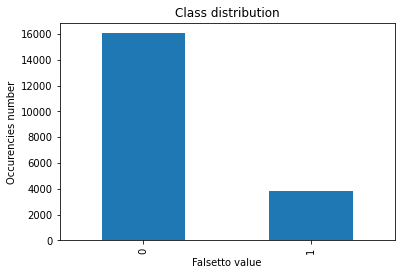

In [13]:
values = df_bin['falsetto'].value_counts().sort_index()
values.plot.bar(**{'title': 'Class distribution', 'xlabel': 'Falsetto value', 'ylabel':'Occurencies number'})

In [14]:
#Manually tuning
max_index = len(index_names)
index_drop = index_names[:len(index_names) - 3248]
df_bin = df_bin.drop(index_drop)
df_bin

,gender,falsetto,spotify_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,...,lowlevel.spectral_rolloff.mean,lowlevel.spectral_rolloff.stdev,lowlevel.spectral_skewness.mean,lowlevel.spectral_skewness.stdev,lowlevel.spectral_spread.mean,lowlevel.spectral_spread.stdev,lowlevel.spectral_strongpeak.mean,lowlevel.spectral_strongpeak.stdev,lowlevel.zerocrossingrate.mean,lowlevel.zerocrossingrate.stdev
9,male,1,4xbJyF9RDa1VLoZNoCFy1r,0.4930,0.500,0.489,0.000130,2.0,0.1630,-11.428,...,4735.147949,3267.810791,1.116404,1.886502,4561006.00,2603007.000,1.443960,1.749026,0.178995,0.119499
15,female,1,6i9b14YXyWIMiQg26IWYA5,0.0370,0.604,0.549,0.000000,5.0,0.0856,-13.252,...,2836.416016,3128.354980,2.057861,1.807891,3878335.25,2358086.750,2.286654,2.462046,0.102232,0.103619
16,female,1,62QRbVm7DqR3eoqgT7pEfs,0.4750,0.408,0.511,0.000000,6.0,0.6250,-7.225,...,2104.636719,2154.778809,2.199072,1.584902,2869073.75,1492111.125,2.827456,2.472313,0.074080,0.069771
23,male,1,59HxRYpU61UgzewVxove4P,0.0300,0.721,0.507,0.000007,9.0,0.0939,-14.160,...,6266.567871,4363.871094,1.217723,1.479403,4497228.50,2384612.000,0.975161,2.004229,0.220188,0.147456
27,male,1,6igsoAR6Co9u7Rq3U7mlOD,0.0195,0.623,0.824,0.130000,6.0,0.0491,-8.971,...,3765.984375,3203.498047,1.726571,1.386702,2836681.00,1839193.250,1.518716,1.905755,0.123977,0.084495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,male,0,4ANFPo7dzs2DdPuONXC9bp,0.0091,0.881,0.549,0.000000,10.0,0.1370,-5.589,...,2941.687500,2695.421143,1.662005,1.671863,4555844.50,2208549.750,1.426403,1.851251,0.101371,0.076952
19966,male,0,2QEnZJ8FwpBoyLKcFcgceT,0.0365,0.801,0.774,0.000003,1.0,0.1140,-5.125,...,2758.055908,2346.302490,1.758831,2.122977,3333951.25,1697798.375,1.092398,1.439533,0.094051,0.067690
19967,male,0,3xEozpt8pAptvpH69iJhOw,0.7860,0.434,0.314,0.000000,10.0,0.1630,-7.780,...,1763.226318,1430.873047,2.420862,1.929476,3221035.00,1425182.125,2.114549,2.202738,0.064748,0.045259
19968,male,0,0DiDStADDVh3SvAsoJAFMk,0.1080,0.795,0.496,0.000000,0.0,0.0645,-5.883,...,2566.776855,2540.895264,1.707363,1.742358,4678761.50,2182918.250,1.449685,1.619190,0.097777,0.080012


In [15]:
df_bin['falsetto'].value_counts()

1    3863
0    3248
Name: falsetto, dtype: int64

### Binary Classifier

In [62]:
y, X = get_y_and_X(df_bin)
enc = OneHotEncoder()
enc_X = enc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(enc_X, y, test_size=0.33, random_state=42)

In [63]:
dt_clf_bin = DecisionTreeClassifier(random_state=12, max_depth=25)
dt_clf_bin.fit(X_train, y_train)
y_pred = dt_clf_bin.predict(X_test)

In [64]:
show_metrics(y_test, y_pred)

Accuracy score: 0.5331156716417911
F1 Macro-Score: 0.5329611345715054
F1 Weighted-Score: 0.5328501848800182


In [65]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.55860113, 0.50828729])

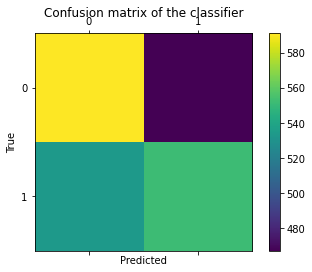

In [66]:
show_confusion_matrix(y_test, y_pred)

## Falsetto exists (`falsetto > 0`)

In [16]:
df_fals = df[df['falsetto'] >= 1]
df_fals

,gender,falsetto,spotify_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,...,lowlevel.spectral_rolloff.mean,lowlevel.spectral_rolloff.stdev,lowlevel.spectral_skewness.mean,lowlevel.spectral_skewness.stdev,lowlevel.spectral_spread.mean,lowlevel.spectral_spread.stdev,lowlevel.spectral_strongpeak.mean,lowlevel.spectral_strongpeak.stdev,lowlevel.zerocrossingrate.mean,lowlevel.zerocrossingrate.stdev
9,male,2.0,4xbJyF9RDa1VLoZNoCFy1r,0.4930,0.500,0.489,0.000130,2.0,0.1630,-11.428,...,4735.147949,3267.810791,1.116404,1.886502,4561006.00,2603007.000,1.443960,1.749026,0.178995,0.119499
15,female,4.0,6i9b14YXyWIMiQg26IWYA5,0.0370,0.604,0.549,0.000000,5.0,0.0856,-13.252,...,2836.416016,3128.354980,2.057861,1.807891,3878335.25,2358086.750,2.286654,2.462046,0.102232,0.103619
16,female,2.0,62QRbVm7DqR3eoqgT7pEfs,0.4750,0.408,0.511,0.000000,6.0,0.6250,-7.225,...,2104.636719,2154.778809,2.199072,1.584902,2869073.75,1492111.125,2.827456,2.472313,0.074080,0.069771
23,male,2.0,59HxRYpU61UgzewVxove4P,0.0300,0.721,0.507,0.000007,9.0,0.0939,-14.160,...,6266.567871,4363.871094,1.217723,1.479403,4497228.50,2384612.000,0.975161,2.004229,0.220188,0.147456
27,male,4.0,6igsoAR6Co9u7Rq3U7mlOD,0.0195,0.623,0.824,0.130000,6.0,0.0491,-8.971,...,3765.984375,3203.498047,1.726571,1.386702,2836681.00,1839193.250,1.518716,1.905755,0.123977,0.084495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19931,male,5.0,0hVXuCcriWRGvwMV1r5Yn9,0.0902,0.798,0.676,0.000000,6.0,0.0894,-5.041,...,2214.200684,2412.225586,2.230500,1.982302,4819406.00,2340881.500,1.472759,1.608723,0.082361,0.064803
19941,male,5.0,5hVghJ4KaYES3BFUATCYn0,0.2300,0.554,0.498,0.000006,9.0,0.7950,-8.866,...,2442.540039,2776.100098,1.572342,1.003438,5065732.50,2131740.500,1.667779,1.885981,0.090978,0.082639
19950,male,4.0,2bjUEg4jBtKBlPdNrTAppI,0.4760,0.562,0.460,0.000000,5.0,0.1070,-4.173,...,1997.761597,2177.704102,2.271033,2.148839,3734125.50,1719284.375,2.184670,2.098266,0.071852,0.064993
19960,female,2.0,5PYQUBXc7NYeI1obMKSJK0,0.1940,0.770,0.882,0.000000,8.0,0.3160,-4.792,...,2493.973877,2550.350098,2.467832,2.670809,4205579.00,2413093.250,2.463060,2.707667,0.090559,0.078907


In [17]:
df_fals['falsetto'].value_counts()

2.0     1510
3.0      884
4.0      736
5.0      266
6.0      184
7.0       94
8.0       84
10.0      74
9.0       31
Name: falsetto, dtype: int64

<AxesSubplot:title={'center':'Class distribution'}, xlabel='Falsetto value', ylabel='Occurencies number'>

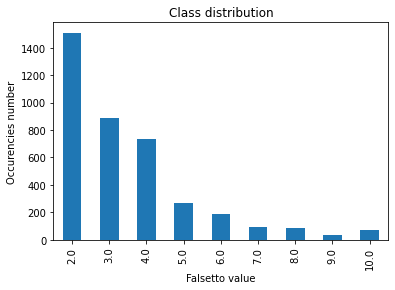

In [18]:
values = df_fals['falsetto'].value_counts().sort_index()
values.plot.bar(**{'title': 'Class distribution', 'xlabel': 'Falsetto value', 'ylabel':'Occurencies number'})

In [72]:
y,X = get_y_and_X(df_fals)
enc = OneHotEncoder()
enc_X = enc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(enc_X, y, test_size=0.33, random_state=42)

In [73]:
dt_clf_fals = DecisionTreeClassifier(random_state=12, class_weight="balanced", criterion="entropy")
dt_clf_fals.fit(X_train, y_train)
y_pred = dt_clf_fals.predict(X_test)

In [74]:
show_metrics(y_test, y_pred)

Accuracy score: 0.3516791044776119
F1 Macro-Score: 0.10399352267065273
F1 Weighted-Score: 0.2995871887758517


In [75]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.67579909, 0.16877637, 0.2039801 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

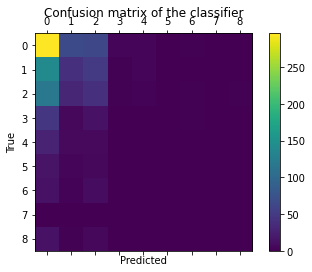

In [76]:
show_confusion_matrix(y_test, y_pred)

### Balancing the dataset

In [77]:
oversample = SMOTE()
X_train_smoted, y_train_smoted = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [78]:
dt_clf_fals_ov = DecisionTreeClassifier(random_state=12)
dt_clf_fals_ov.fit(X_train_smoted, y_train_smoted)
y_pred = dt_clf_fals_ov.predict(X_test)

In [83]:
show_metrics(y_test, y_pred)

Accuracy score: 0.355410447761194
F1 Macro-Score: 0.0987295425668513
F1 Weighted-Score: 0.2801662337775929


In [80]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.75570776, 0.14767932, 0.06965174, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04      ])

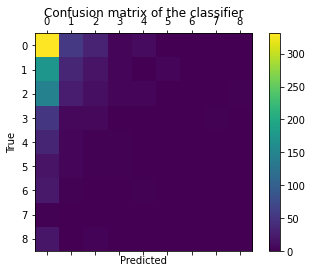

In [81]:
show_confusion_matrix(y_test, y_pred)